# Data Preprocessing 

### Data selection (site2, Office, Hourly)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_train = pd.read_csv("data/train.csv")
data_meta = pd.read_csv("data/building_metadata.csv")

In [3]:
mer_data = pd.merge(data_train, data_meta, on = 'building_id')
mer_data.timestamp = pd.to_datetime(mer_data['timestamp'])

In [4]:
mer_data = mer_data.set_index("timestamp")

In [5]:
mer_data.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
timestamp,,,,,,,,
2016-01-01 00:00:00,0,0,0.0,0,Education,7432,2008.0,NaN
2016-01-01 01:00:00,0,0,0.0,0,Education,7432,2008.0,NaN
2016-01-01 02:00:00,0,0,0.0,0,Education,7432,2008.0,NaN
2016-01-01 03:00:00,0,0,0.0,0,Education,7432,2008.0,NaN
2016-01-01 04:00:00,0,0,0.0,0,Education,7432,2008.0,NaN


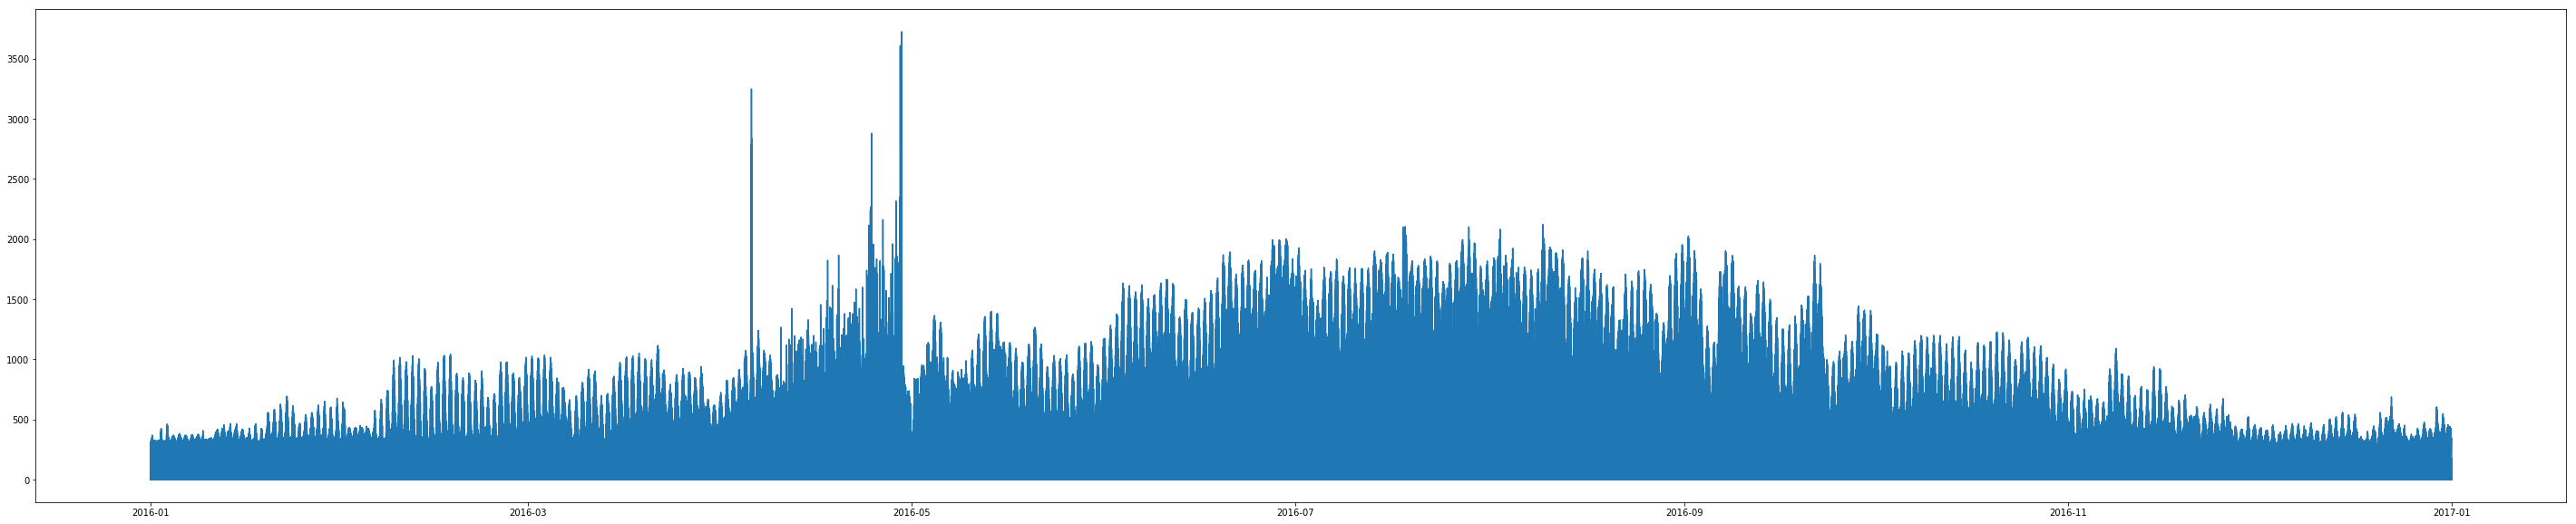

In [6]:
fig = plt.figure(figsize=(50,10))
tmp = mer_data[(mer_data['site_id']==2)&(mer_data['primary_use']=='Office')]
plt.plot(tmp['meter_reading'])

In [7]:
tmp.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
timestamp,,,,,,,,
2016-01-01 00:00:00,157,0,28.10,2,Office,5258,NaN,NaN
2016-01-01 01:00:00,157,0,26.57,2,Office,5258,NaN,NaN
2016-01-01 02:00:00,157,0,25.73,2,Office,5258,NaN,NaN
2016-01-01 03:00:00,157,0,25.96,2,Office,5258,NaN,NaN
2016-01-01 04:00:00,157,0,25.59,2,Office,5258,NaN,NaN


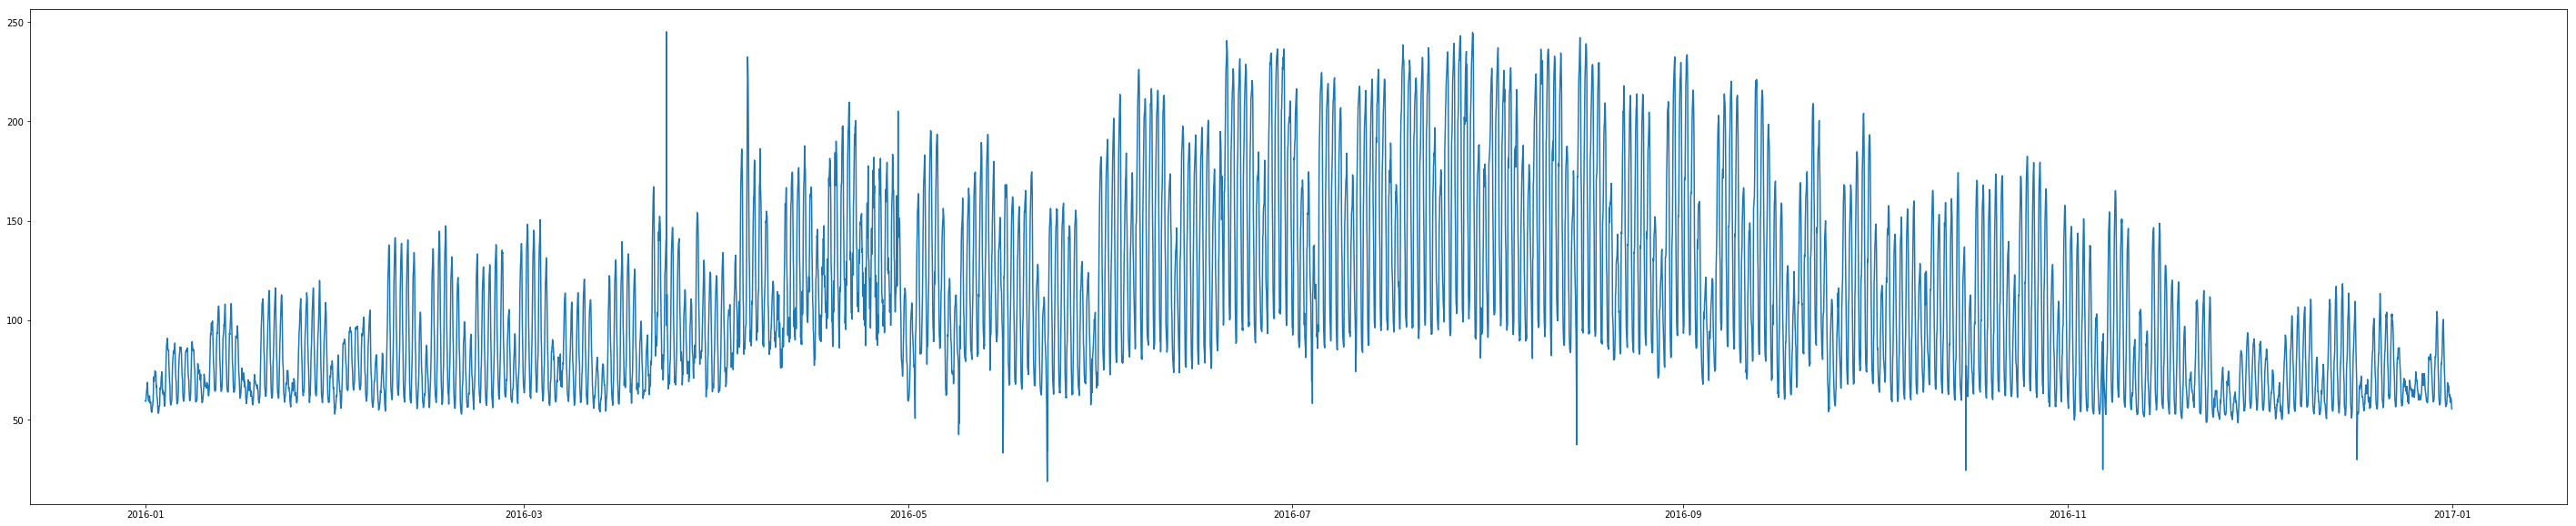

In [8]:
fig = plt.figure(figsize=(50,10))
a=tmp.resample("60T").mean()
plt.plot(a['meter_reading'])

In [9]:
a.to_csv("all.csv")

### Create multivariate data (merge weather data)

In [36]:
train = pd.read_csv("all.csv")
w_train = pd.read_csv("data/weather_train.csv")
meta_building = pd.read_csv("data/building_metadata.csv")

In [37]:
train.head()

,timestamp,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count
0,2016-01-01 00:00:00,230.521739,0.73913,59.416239,2.0,81206.217391,1968.0625,NaN
1,2016-01-01 01:00:00,230.521739,0.73913,59.299878,2.0,81206.217391,1968.0625,NaN
2,2016-01-01 02:00:00,230.521739,0.73913,60.380122,2.0,81206.217391,1968.0625,NaN
3,2016-01-01 03:00:00,230.521739,0.73913,62.482302,2.0,81206.217391,1968.0625,NaN
4,2016-01-01 04:00:00,230.521739,0.73913,64.023207,2.0,81206.217391,1968.0625,NaN


In [38]:
weather = w_train[w_train['site_id'] == 2]

In [39]:
weather.isnull().sum()

site_id                  0
timestamp                0
air_temperature          1
cloud_coverage        2354
dew_temperature          1
precip_depth_1_hr       66
sea_level_pressure      44
wind_direction         591
wind_speed               5
dtype: int64

In [40]:
weather.shape

(8783, 9)

In [41]:
weather = weather.drop(columns = ['cloud_coverage'])

In [42]:
weather.isnull().sum()

site_id                 0
timestamp               0
air_temperature         1
dew_temperature         1
precip_depth_1_hr      66
sea_level_pressure     44
wind_direction        591
wind_speed              5
dtype: int64

In [43]:
weather = weather.fillna(method = "bfill")

In [44]:
weather.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
17547,2,2016-01-01 00:00:00,15.6,-5.6,0.0,1015.3,270.0,3.6
17548,2,2016-01-01 01:00:00,13.9,-5.6,0.0,1015.6,270.0,4.1
17549,2,2016-01-01 02:00:00,13.3,-5.6,0.0,1016.0,270.0,3.1
17550,2,2016-01-01 03:00:00,12.2,-6.1,0.0,1016.6,280.0,3.1
17551,2,2016-01-01 04:00:00,11.7,-6.7,0.0,1017.0,270.0,3.1


In [45]:
weather = weather.set_index('timestamp')

In [46]:
train = train.set_index('timestamp')

In [47]:
weather.head()

,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,2,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,2,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,2,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,2,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,2,11.7,-6.7,0.0,1017.0,270.0,3.1


In [48]:
train.head()

,building_id,meter,meter_reading,site_id,square_feet,year_built,floor_count
timestamp,,,,,,,
2016-01-01 00:00:00,230.521739,0.73913,59.416239,2.0,81206.217391,1968.0625,NaN
2016-01-01 01:00:00,230.521739,0.73913,59.299878,2.0,81206.217391,1968.0625,NaN
2016-01-01 02:00:00,230.521739,0.73913,60.380122,2.0,81206.217391,1968.0625,NaN
2016-01-01 03:00:00,230.521739,0.73913,62.482302,2.0,81206.217391,1968.0625,NaN
2016-01-01 04:00:00,230.521739,0.73913,64.023207,2.0,81206.217391,1968.0625,NaN


In [49]:
s=pd.DataFrame(train['meter_reading'])
s.head()

,meter_reading
timestamp,
2016-01-01 00:00:00,59.416239
2016-01-01 01:00:00,59.299878
2016-01-01 02:00:00,60.380122
2016-01-01 03:00:00,62.482302
2016-01-01 04:00:00,64.023207


In [50]:
mer = pd.merge(s, weather, left_index = True, right_index = True ,how = 'left')

In [51]:
mer.head()

,meter_reading,site_id,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-01-01 00:00:00,59.416239,2.0,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,59.299878,2.0,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,60.380122,2.0,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,62.482302,2.0,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,64.023207,2.0,11.7,-6.7,0.0,1017.0,270.0,3.1


In [52]:
mer.to_csv('mer_weather2.csv')

### Weather EDA
used https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

In [53]:
mer=pd.read_csv('mer_weather2.csv')

In [54]:
dataset=mer.drop(['site_id'], axis=1)

In [55]:
dataset=dataset.set_index('timestamp')

In [56]:
dataset.head()

,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,59.416239,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,59.299878,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,60.380122,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,62.482302,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,64.023207,11.7,-6.7,0.0,1017.0,270.0,3.1


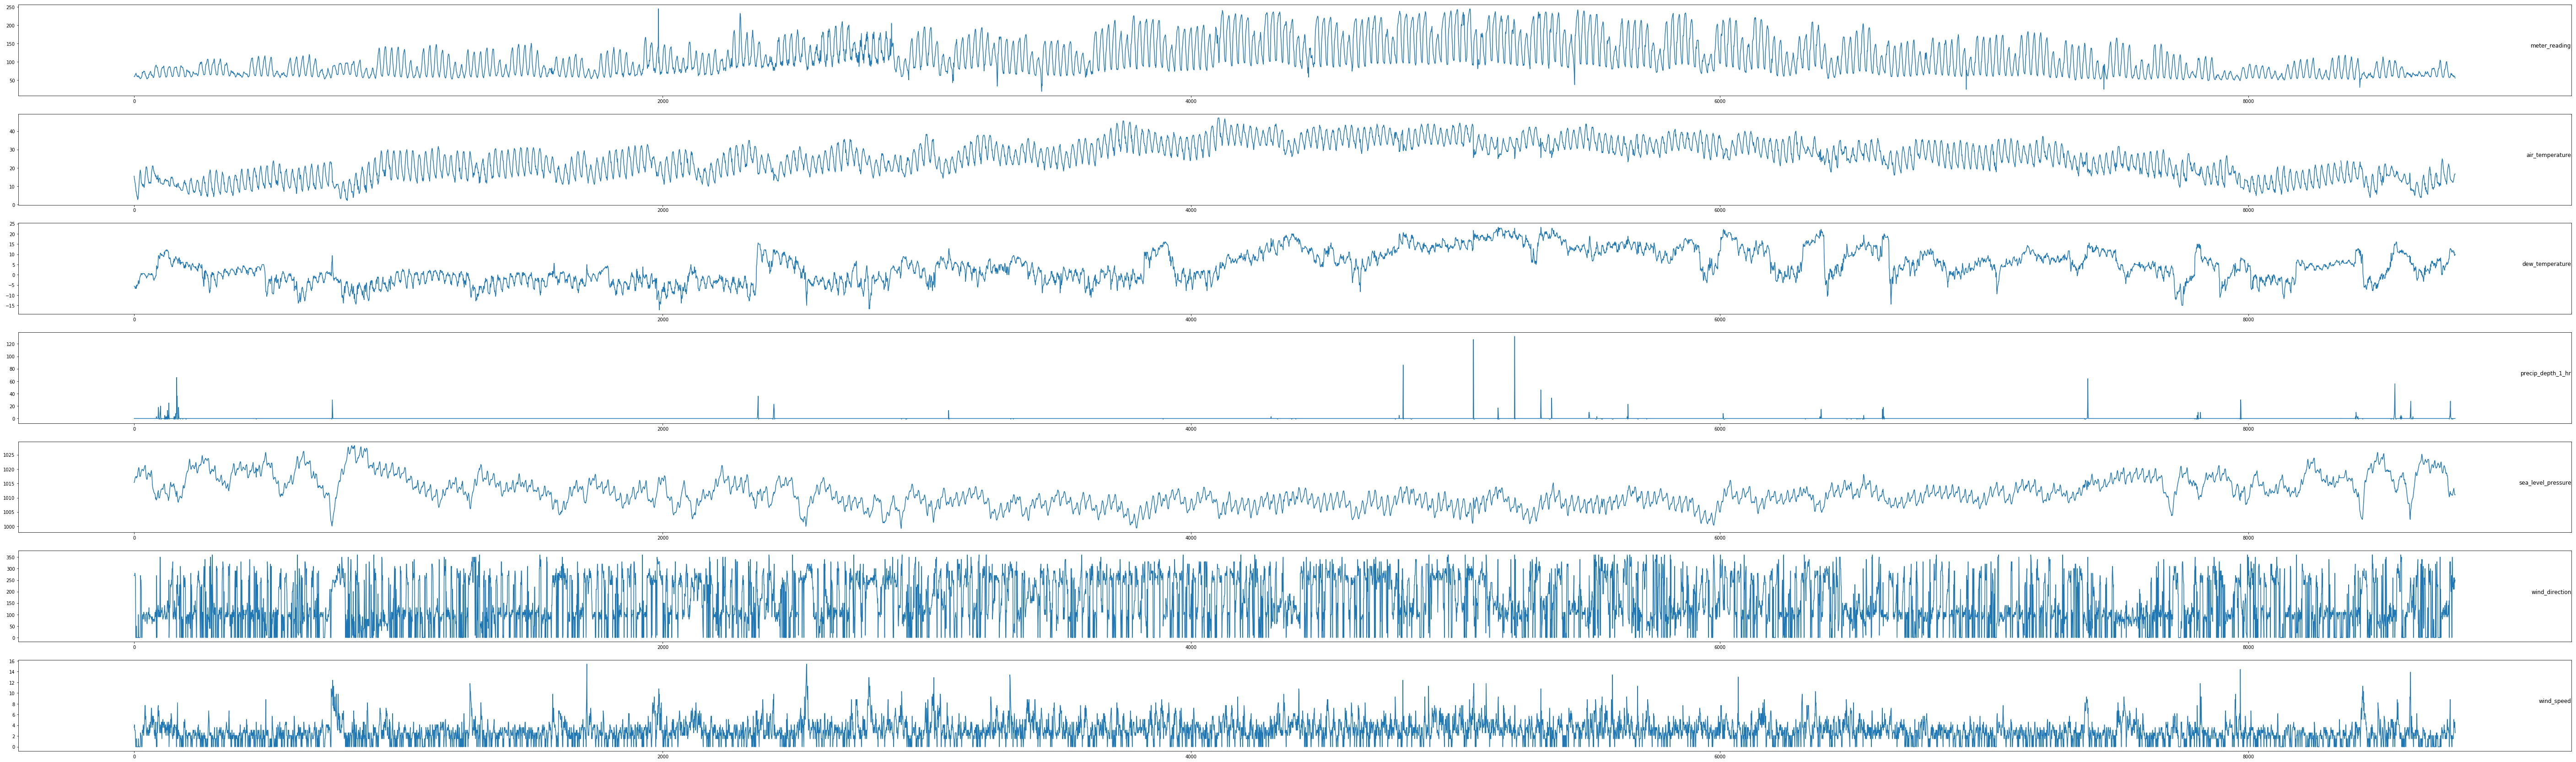

In [57]:
from matplotlib import pyplot
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6]
i = 1
# plot each column
pyplot.figure(figsize=(100,30))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

# LSTM

### Hyperparameter Tuning

In [58]:
mer=pd.read_csv('mer_weather2.csv')

In [59]:
dataset=mer.drop(['site_id'], axis=1)

In [60]:
dataset=dataset.set_index('timestamp')

In [61]:
dataset.head()

,meter_reading,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,
2016-01-01 00:00:00,59.416239,15.6,-5.6,0.0,1015.3,270.0,3.6
2016-01-01 01:00:00,59.299878,13.9,-5.6,0.0,1015.6,270.0,4.1
2016-01-01 02:00:00,60.380122,13.3,-5.6,0.0,1016.0,270.0,3.1
2016-01-01 03:00:00,62.482302,12.2,-6.1,0.0,1016.6,280.0,3.1
2016-01-01 04:00:00,64.023207,11.7,-6.7,0.0,1017.0,270.0,3.1


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
import numpy as np
import math
from sklearn.metrics import mean_squared_error


def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# normalize features
values = dataset.values
values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
def tuning(window_size,num_layer,batch_size,epoch):

    window_size=window_size

    # frame as supervised learning
    reframed = series_to_supervised(scaled, window_size, 1)

    # drop columns we don't want to predict
    reframed.drop(reframed.columns[[-6,-5,-4,-3,-2,-1]], axis=1, inplace=True)

    #split train and test
    values = reframed.values
    n_test_hours = 31*24
    train = values[:-n_test_hours, :]
    test = values[-n_test_hours:, :]
    # split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    # reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], window_size, int(train_X.shape[1]/window_size)))
    test_X = test_X.reshape((test_X.shape[0], window_size, int(test_X.shape[1]/window_size)))

    # design model
    model = Sequential()
    for i in range(num_layer-1):
        model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')
    
    #fit model
    history = model.fit(train_X, train_y, epochs=epoch, batch_size=batch_size, 
                        validation_data=(test_X, test_y), verbose=0, shuffle=False)

    # make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], window_size*test_X.shape[2]))
    test_X[:,1:]

    # invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, 1:7]), axis=1)
    inv_yhat
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]

    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, 1:7]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]
    
    # return RMSE
    rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
    return rmse

In [ ]:
random_state = 42
num_loop = 30
hyperparameters_list = []

for loop in range(num_loop):
    window_size=np.random.choice(np.arange(24, 24*8, 24))
    num_layer=np.random.randint(1,4)
    batch_size=np.random.randint(32,129)
    epoch=np.random.randint(50,201)
    
    parameters = {'loop':loop,
                'window_size': window_size,
                'num_layer': num_layer,
                'batch_size': batch_size,
                'epoch': epoch}
    
    score = tuning(window_size,num_layer,batch_size,epoch)
    
    parameters['score'] = score
    
    print(f"{loop:2} iteration = {parameters['epoch']}, Score = {parameters['score']:.3f")
    
    hyperparameters_list.append(parameters)
    hyperparameters_data = pd.DataFrame(hyperparameters_list)
    hyperparameters_data = hyperparameters_data.sort_values(by="score")
    
    hyperparameters_data.to_csv("paramsearch.csv")
    
hyperparameters_data.head(10)

Found best hyperparameters to be <    >

### Fit model

In [ ]:
# load dataset
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

window_size=24

# frame as supervised learning
reframed = series_to_supervised(scaled, window_size, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[-6,-5,-4,-3,-2,-1]], axis=1, inplace=True)
print(reframed.head())

In [ ]:
#split train and test
values = reframed.values
n_test_hours = 31*24
train = values[:-n_test_hours, :]
test = values[-n_test_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], window_size, int(train_X.shape[1]/window_size)))
test_X = test_X.reshape((test_X.shape[0], window_size, int(test_X.shape[1]/window_size)))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential

# design network - 3 layered lstm
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
history = model.fit(train_X, train_y, epochs=5, batch_size=72, 
                    validation_data=(test_X, test_y), verbose=2, shuffle=False)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], window_size*test_X.shape[2]))
test_X[:,1:]
# # invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:7]), axis=1)
inv_yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

test_y
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:7]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

# Result EDA

In [ ]:
r=np.concatenate((yhat, test_X[:, 1:7]), axis=1)
r=scaler.inverse_transform(r)
r=pd.DataFrame(r)

In [ ]:
len(r[0])

In [ ]:
def plot_series(time, series, format="-",start=0,end=None):
    plt.plot(time[start:end],series[start:end],format)
    plt.xlabel("Time")
    plt.ylabel("meter reading")
    plt.grid(True)

In [ ]:
import matplotlib.pyplot as plt
series = inv_y
time_step=[]
for x in range(len(series)):
    time_step.append(x)
time=np.array(time_step)
plt.figure(figsize=(50, 6))
plot_series(time,series)
plot_series(time,r[0])